# 머신러닝 - KNN 최근접이웃 - 분류
  

**2019-2023 [FinanceData.KR]()**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 데이터 생성
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

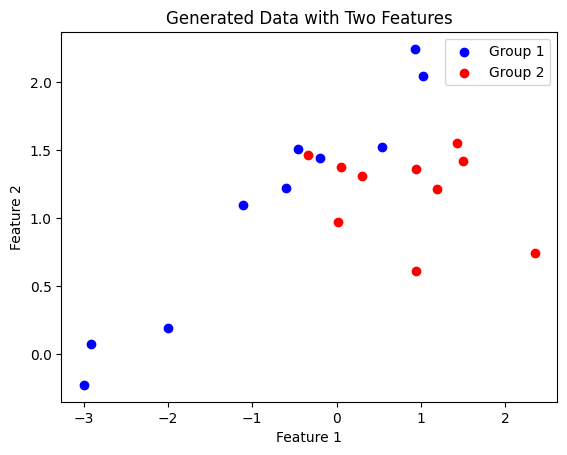

In [ ]:
# 두 그룹의 데이터 추출
group_1_data = X[y == 0]
group_2_data = X[y == 1]

# 데이터 시각화
plt.figure()
plt.scatter(group_1_data[:, 0], group_1_data[:, 1], label='Group 1', color='b')
plt.scatter(group_2_data[:, 0], group_2_data[:, 1], label='Group 2', color='r')
plt.title('Generated Data with Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knclf = KNeighborsClassifier(n_neighbors=3)

knclf.fit(X_train, y_train) #모델 학습

print('검증 데이터', y_test)
print('예측 데이터', knclf.predict(X_test))

print('정확도', knclf.score(X_test, y_test))

검증 데이터 [0 0 0 1 1]
예측 데이터 [0 0 1 1 1]
정확도 0.8


### 붓꽃 데이터셋 - kNN 분류


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()   #붓꽃 데이터
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                train_size=0.7, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

print('검증 데이터', y_test)
print('모델 검증', knn.predict(x_test))
print('모델 정확도', knn.score(x_test, y_test))

검증 데이터 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
모델 검증 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
모델 정확도 0.9777777777777777


In [ ]:
# 새로운 데이터로 예측
import numpy as np

new_iris = np.array([[5, 2.9, 1, 0.2]])
result = knn.predict(new_iris)
print('새로운 데이터로 예측하기', result)
print('예측한 품종', iris['target_names'][result])

새로운 데이터로 예측하기 [0]
예측한 품종 ['setosa']


### 타이타닉 데이터셋 - kNN 분류

In [ ]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
len(titanic)

891

In [ ]:
# categorical feature to numeric
titanic['gender'] = titanic['sex'].astype('category').cat.codes
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [ ]:
# 결측치 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
gender           0
dtype: int64

In [ ]:
# 결측치를 중앙값으로 설정
median = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median)

In [ ]:
titanic_data = titanic[['pclass','gender','age','fare']]
titanic_data.head()

,pclass,gender,age,fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
titanic_target = titanic['survived']
titanic_target.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic_data, titanic_target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 예측
model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [ ]:
# 정확도
model.score(x_test, y_test)

0.6771300448430493

----
**2019-2023 [FinanceData.KR]()**
